### Play with the data

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('./Text_DeepFake_Detector/LLM.csv')
df2 = pd.read_csv('./Text_DeepFake_Detector/Training_Essay_Data.csv')
df3 = pd.read_csv('./Text_DeepFake_Detector/test.csv')
df4 = pd.read_csv('./Text_DeepFake_Detector/train.csv')
df5 = pd.read_csv('./Text_DeepFake_Detector/validation.csv')

# The plan is to build out a unique dataset with this open source data

In [3]:
df1.head()

,Text,Label
0,y r u always l8 to the meetings?,student
1,The project team embraced a user-centric desig...,ai
2,"i dont like dealing with risks, it's too stres...",student
3,"i dont worry about reliability, it's good enough",student
4,"i dont care about human-centered design, just ...",student


In [4]:
df2.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [5]:
df3.head()

,user_id,status_id,screen_name,account.type,class_type
0,3171109449,1123915745178656769,human#17,human,human
1,18839785,1173906284195852290,human#11,human,human
2,343587159,1197343799846027265,human#1,human,human
3,1197916267975335939,1208274159274475521,bot#12,bot,rnn
4,15088390,1084181032927059970,human#10,human,human


In [6]:
df4.head()

,user_id,status_id,screen_name,account.type,class_type
0,1110407881030017024,1208265880146046976,bot#9,bot,others
1,3171109449,1091463908118941696,human#17,human,human
2,1110686081341632512,1199055191028293633,bot#23,bot,others
3,1110307772783124480,1214698264701722626,bot#1,bot,others
4,979586167405363200,1209229478934695937,bot#11,bot,rnn


In [7]:
df5.head()

,user_id,status_id,screen_name,account.type,class_type
0,343587159,1175975242164068352,human#1,human,human
1,18839785,1216367699028140034,human#11,human,human
2,262794965,1073395310406250496,human#8,human,human
3,14260960,1235202464959340544,human#9,human,human
4,1110407881030017024,1199674264472834048,bot#9,bot,others


# I'll throw away df 3-5. Nothing usable.
# DF 1 is labeled and ready to go. I want to maximize on DF2 so I will use regex to slice everything into sentences And relabel the data

In [8]:
df2.iloc[0]['text']

"Car-free cities have become a subject of increasing interest and debate in recent years, as urban areas around the world grapple with the challenges of congestion, pollution, and limited resources. The concept of a car-free city involves creating urban environments where private automobiles are either significantly restricted or completely banned, with a focus on alternative transportation methods and sustainable urban planning. This essay explores the benefits, challenges, and potential solutions associated with the idea of car-free cities.  Benefits of Car-Free Cities  Environmental Sustainability: Car-free cities promote environmental sustainability by reducing air pollution and greenhouse gas emissions. Fewer cars on the road mean cleaner air and a significant decrease in the contribution to global warming.  Improved Public Health: A reduction in automobile usage can lead to better public health outcomes. Fewer cars on the road result in fewer accidents and a safer urban environme

In [9]:
df2[df2['generated']==0].iloc[0]['text']

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

# 0 label is human, 1 label is Bot. Lets convert our df1 so that they can be concatenated 

In [10]:
df1['Label'] = df1['Label'].replace({'student': 0, 'ai': 1})

In [11]:
print("Number of unique Labels in Label column (Confirming it is 2): " + str(df1.Label.nunique()))

Number of unique Labels in Label column (Confirming it is 2): 2


## Now lets Transform df2 into a lot more useable data. 

In [12]:
import re

def create_paragraph_label_dict(df, text_col, label_col):
    """
    Create a dictionary from a DataFrame by splitting text into paragraphs and pairing with labels.

    Parameters:
    df (pd.DataFrame): DataFrame containing the text and labels.
    text_col (str): Name of the column containing the text.
    label_col (str): Name of the column containing the labels.

    Returns:
    dict: A dictionary with paragraphs as keys and corresponding labels as values.
    """
    paragraph_dict = {}

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Split the text into paragraphs/sentences
        paragraphs = re.split(r'\.\s+', row[text_col])
        
        # Add each paragraph to the dictionary with the corresponding label
        for paragraph in paragraphs:
            if paragraph:  # Check if paragraph is not empty
                paragraph_dict[paragraph] = row[label_col]

    return paragraph_dict

# Example usage
# df2 is your DataFrame with 'text' and 'generated' columns
paragraph_dict = create_paragraph_label_dict(df2, 'text', 'generated')

In [13]:
# Convert the dictionary to a list of tuples
data_list = list(paragraph_dict.items())

# Create a DataFrame from the list of tuples
df2 = pd.DataFrame(data_list, columns=['text', 'generated'])
df2.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,The concept of a car-free city involves creati...,1
2,"This essay explores the benefits, challenges, ...",1
3,Benefits of Car-Free Cities Environmental Sus...,1
4,Fewer cars on the road mean cleaner air and a ...,1


# This gives us a ton more data to play with! Let's concat. 

In [14]:
df2.columns = ['Text', 'Label']

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426333 entries, 0 to 426332
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    426333 non-null  object
 1   Label   426333 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [16]:
combined_df = pd.concat([df1, df2], ignore_index=True)

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427436 entries, 0 to 427435
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Text    427436 non-null  object 
 1   Label   427435 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.5+ MB


### Seems like plenty of data to me! Let's PreProcess and Train some models. 

## Bulding a few models

In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import BatchNormalization
from sklearn import preprocessing, decomposition, model_selection, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing import sequence, text
from nltk import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
stop_words = stopwords.words('english')

2024-01-10 16:49:47.363401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
def calculate_accuracy(y_true, predicted_labels):
    """
    Calculate accuracy from a confusion matrix.

    Args:
        y_true (array-like): True labels.
        predicted_labels (array-like): Predicted labels.

    Returns:
        float: Accuracy.
    """
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, predicted_labels)

    # Extract values from the confusion matrix
    true_positives = conf_matrix[1, 1]  # Actual 1, Predicted 1
    true_negatives = conf_matrix[0, 0]  # Actual 0, Predicted 0
    total_population = len(y_true)       # Total number of samples

    # Calculate accuracy
    accuracy = (true_positives + true_negatives) / total_population

    return accuracy

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    combined_df['Text'],  # Your preprocessed text data
    combined_df['Label'], 
    test_size=0.2,  # You can adjust the test size as needed
    random_state=42
)

In [24]:
unique_labels = combined_df['Label'].unique()
print("Unique Labels:", unique_labels)

Unique Labels: [ 0.  1. nan]


In [25]:
y_train = np.nan_to_num(y_train, nan=0.0)

In [26]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xtest_tfv = tfv.transform(X_test)

/Users/abdulrahmanamer/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


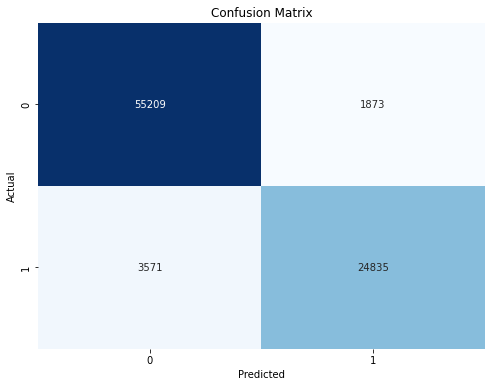

In [31]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, y_train)
predictions = clf.predict_proba(xtest_tfv)

threshold = 0.5 
predictions= (predictions[:, 1] > threshold).astype(int)

conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
accuracy = calculate_accuracy(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9363185476324163


In [33]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

ctv.fit(list(X_train) + list(X_test))
xtrain_ctv =  ctv.transform(X_train) 
xtest_ctv = ctv.transform(X_test)

/Users/abdulrahmanamer/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


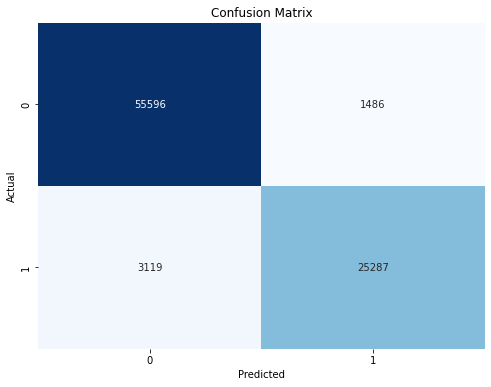

In [35]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_ctv, y_train)
predictions = clf.predict_proba(xtest_ctv)

threshold = 0.5  
predictions= (predictions[:, 1] > threshold).astype(int)

conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
accuracy = calculate_accuracy(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9461327905670971


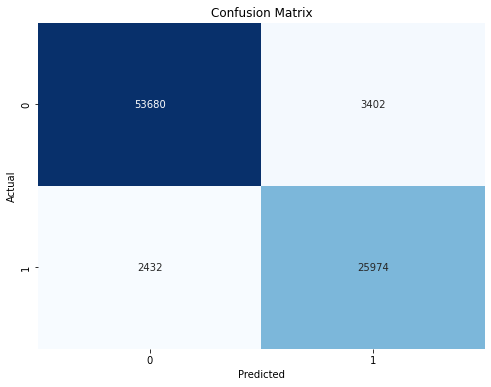

In [37]:
clf = MultinomialNB()
clf.fit(xtrain_ctv, y_train)
predictions = clf.predict_proba(xtest_ctv)

threshold = 0.5  
predictions= (predictions[:, 1] > threshold).astype(int)

conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
accuracy = calculate_accuracy(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9317565038367958


## Word Vectors and NN 

In [41]:
embeddings_index = {}

with open('./glove.840B.300d.txt', 'r', encoding='utf-8') as f:
    for line in tqdm(f):
        parts = line.split()
        word = parts[0]
        try:
            coefs = np.asarray(parts[1:], dtype='float32')
        except ValueError:
            continue  # Skip lines where conversion fails
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')


0it [00:00, ?it/s]
1726it [00:00, 17259.32it/s]
3483it [00:00, 17438.07it/s]
5357it [00:00, 18026.97it/s]
7192it [00:00, 18152.88it/s]
9008it [00:00, 18012.92it/s]
10906it [00:00, 18339.61it/s]
12741it [00:00, 18111.53it/s]
14643it [00:00, 18394.05it/s]
16507it [00:00, 18440.76it/s]
18352it [00:01, 18380.56it/s]
20191it [00:01, 17240.94it/s]
22037it [00:01, 17593.25it/s]
23808it [00:01, 16724.88it/s]
25652it [00:01, 17210.51it/s]
27486it [00:01, 17535.31it/s]
29280it [00:01, 17651.20it/s]
31152it [00:01, 17963.56it/s]
32955it [00:01, 17949.07it/s]
34758it [00:01, 17958.86it/s]
36557it [00:02, 17757.37it/s]
38336it [00:02, 17659.05it/s]
40180it [00:02, 17888.19it/s]
41971it [00:02, 17524.74it/s]
43822it [00:02, 17811.62it/s]
45643it [00:02, 17927.40it/s]
47545it [00:02, 18248.99it/s]
49372it [00:02, 18184.97it/s]
51206it [00:02, 18230.24it/s]
53030it [00:02, 17524.36it/s]
54789it [00:03, 16295.92it/s]
56664it [00:03, 16978.02it/s]
58430it [00:03, 17169.95it/s]
60307it [00:03, 17630.14i

898524it [00:49, 18058.18it/s]
900356it [00:49, 18133.67it/s]
902217it [00:49, 18273.76it/s]
904046it [00:49, 18170.28it/s]
905918it [00:49, 18332.53it/s]
907752it [00:49, 16711.76it/s]
909630it [00:50, 17289.34it/s]
911454it [00:50, 17560.22it/s]
913352it [00:50, 17967.98it/s]
915164it [00:50, 18010.46it/s]
916975it [00:50, 17984.65it/s]
918781it [00:50, 17625.34it/s]
920578it [00:50, 17725.33it/s]
922488it [00:50, 18127.81it/s]
924330it [00:50, 18213.23it/s]
926239it [00:50, 18471.79it/s]
928133it [00:51, 18610.93it/s]
930043it [00:51, 18754.71it/s]
931938it [00:51, 18812.08it/s]
933821it [00:51, 17898.25it/s]
935736it [00:51, 18258.89it/s]
937589it [00:51, 18335.61it/s]
939510it [00:51, 18591.06it/s]
941393it [00:51, 18660.21it/s]
943263it [00:51, 18388.68it/s]
945188it [00:51, 18642.35it/s]
947094it [00:52, 18764.69it/s]
949025it [00:52, 18925.15it/s]
950920it [00:52, 18862.98it/s]
952841it [00:52, 18965.91it/s]
954739it [00:52, 18905.88it/s]
956631it [00:52, 18799.57it/s]
958557it

1771945it [01:37, 18764.36it/s]
1773822it [01:37, 18621.46it/s]
1775685it [01:37, 18385.18it/s]
1777564it [01:37, 18504.35it/s]
1779416it [01:38, 17668.54it/s]
1781191it [01:38, 17624.45it/s]
1783003it [01:38, 17766.85it/s]
1784862it [01:38, 18006.31it/s]
1786693it [01:38, 18094.37it/s]
1788604it [01:38, 18394.99it/s]
1790446it [01:38, 18140.77it/s]
1792329it [01:38, 18343.02it/s]
1794166it [01:38, 18002.38it/s]
1795976it [01:39, 18028.80it/s]
1797855it [01:39, 18252.31it/s]
1799682it [01:39, 18124.40it/s]
1801496it [01:39, 17324.92it/s]
1803237it [01:39, 17152.67it/s]
1804958it [01:39, 17119.84it/s]
1806674it [01:39, 16842.75it/s]
1808502it [01:39, 17258.71it/s]
1810341it [01:39, 17588.77it/s]
1812142it [01:39, 17636.13it/s]
1813951it [01:40, 17767.65it/s]
1815777it [01:40, 17913.72it/s]
1817677it [01:40, 18233.42it/s]
1819502it [01:40, 16822.95it/s]
1821207it [01:40, 15668.77it/s]
1822925it [01:40, 16078.72it/s]
1824747it [01:40, 16677.54it/s]
1826609it [01:40, 17230.29it/s]
1828492i

Found 2195884 word vectors.


In [48]:
def sent2vec(s):
    words = str(s).lower()  # Convert to lowercase
    words = word_tokenize(words)  # Tokenize the sentence
    words = [w for w in words if not w in stop_words]  # Remove stopwords
    words = [w for w in words if w.isalpha()]  # Keep only alphabetic words

    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except KeyError:
            continue  # Skip words not found in embeddings_index

    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [49]:
xtrain_glove = [sent2vec(x) for x in tqdm(X_train)]
xtest_glove = [sent2vec(x) for x in tqdm(X_test)]


 19%|██████▍                           | 64952/341948 [00:20<01:11, 3891.77it/s]


 43%|██████████████▏                  | 146420/341948 [00:40<00:57, 3391.02it/s]


 66%|██████████████████████▌           | 227258/341948 [01:02<03:04, 620.60it/s]


 83%|███████████████████████████▎     | 283040/341948 [01:26<00:14, 4192.84it/s]


100%|█████████████████████████████████| 341948/341948 [01:43<00:00, 3292.51it/s]

 15%|█████▎                             | 12912/85488 [00:04<00:19, 3779.61it/s]


100%|███████████████████████████████████| 85488/85488 [00:22<00:00, 3775.80it/s]


In [50]:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xtest_glove_scl = scl.transform(xtest_glove)

In [51]:
# A simple model as a starting ground
model = Sequential()
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))  # Single neuron with sigmoid activation

model.compile(loss='binary_crossentropy', optimizer='adam')


2024-01-10 17:15:17.353494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
model.fit(xtrain_glove_scl, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(xtest_glove_scl, y_test))

Epoch 1/5
5343/5343 [==============================] - 17s 3ms/step - loss: 0.2674 - val_loss: 0.2143
Epoch 2/5
5343/5343 [==============================] - 14s 3ms/step - loss: 0.2246 - val_loss: 0.1969
Epoch 3/5
5343/5343 [==============================] - 12s 2ms/step - loss: 0.2091 - val_loss: 0.1921
Epoch 4/5
5343/5343 [==============================] - 13s 2ms/step - loss: 0.1977 - val_loss: 0.1840
Epoch 5/5
5343/5343 [==============================] - 12s 2ms/step - loss: 0.1910 - val_loss: 0.1815


In [56]:
predictions = model.predict(xtest_glove_scl)

2672/2672 [==============================] - 2s 750us/step


In [62]:
predictions

array([[2.4946588e-03],
       [5.5473429e-01],
       [1.2438890e-02],
       ...,
       [4.8272527e-04],
       [2.6313672e-03],
       [1.3716604e-02]], dtype=float32)

In [65]:
threshold = 0.5
labels = (predictions > threshold).astype(int)

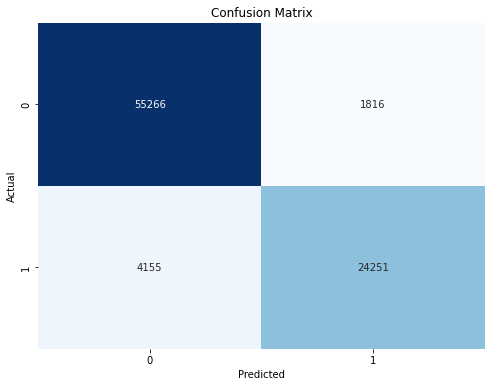

In [66]:
conf_matrix = confusion_matrix(y_test, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
accuracy = calculate_accuracy(y_test,labels)
print("Accuracy:", accuracy)

Accuracy: 0.9301539397342317


#### LogRegressor seemed to perform the best; but for a vanilla NN to perform so well It is impressive the power of using a NN in comparison. By fine tuning a NN it seems it has the ability to beat our current score

## Next Steps: 
### Grid Searching for best parameters
### Embeddings Layer as entry way for NN
### Ensembling for stronger predictions